<a href="https://colab.research.google.com/github/gab-es21/sea-turtles-detection/blob/gab-es21%2Fissue13/yolo_v8_roboflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO v8 Sea Turtle Detection

Make sure that we have access to GPU.

In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


Chrome Developer Tools

## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Inference with Pre-trained COCO Model

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

Parameters breakdown:
- __task=detect__ : Specifies that the task is object detection.
- __mode=predict__ : Indicates that the model is being used for prediction.
- __model=yolov8n.pt__: The YOLO model file to be used for the prediction.
- __conf=0.25__ : Sets the confidence threshold for the detection. Only detections with a confidence score higher than 0.25 will be considered.
- __source__ : Specifies the input source for the detection. In this case, it's an image URL pointing to a picture of sea turtles from Shutterstock.
- __save=True__ : This parameter indicates that the detected results will be saved.


Note: This detection is done before we train the model and uses the pre-defined YOLO classes.

/content
100% 6.23M/6.23M [00:00<00:00, 52.9MB/s]

2023-09-22 17:19:33.270754: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-22 17:19:35.146703: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 1.64M/1.64M [00:00<00:00, 13.5MB/s]
image 1/1 /content/stock-photo-pair-of-sea-turtles-from-drone-1147348481.jpg: 544x640 3 birds, 1 kite, 84.0ms
Speed: 0.8ms pre-process, 84.0ms inference, 365.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


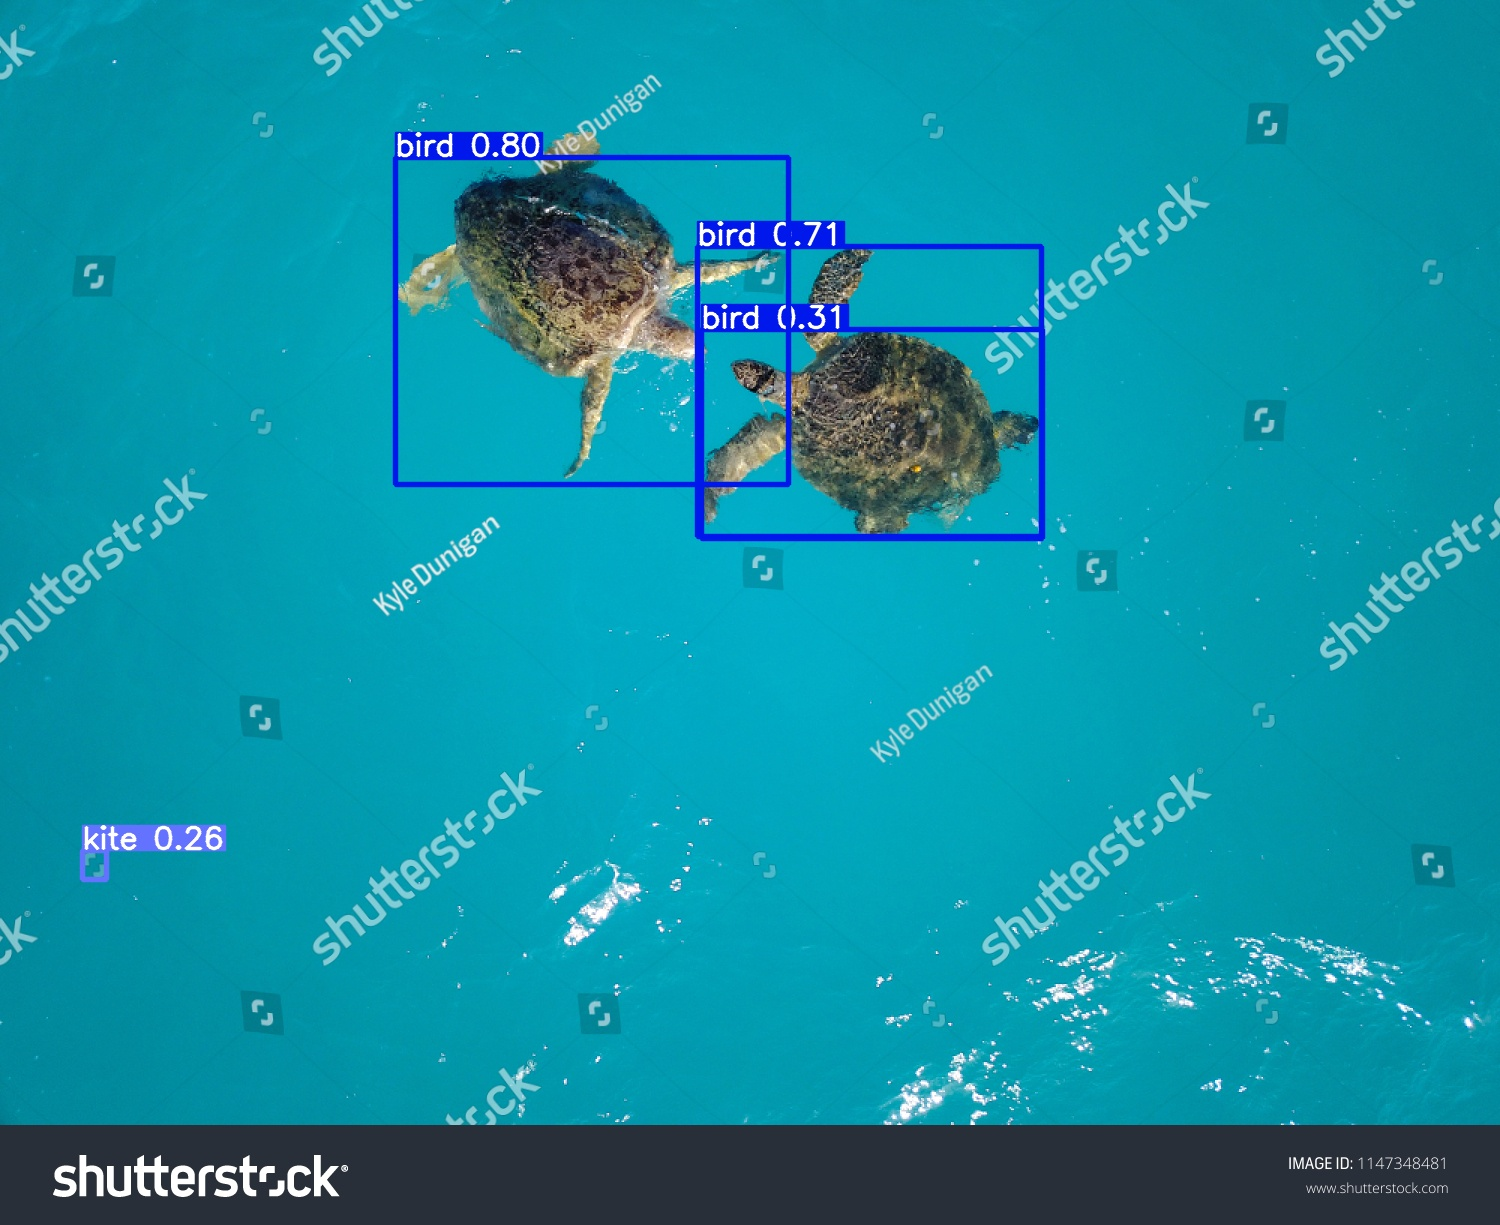

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://www.shutterstock.com/shutterstock/photos/1147348481/display_1500/stock-photo-pair-of-sea-turtles-from-drone-1147348481.jpg' save=True

Image(filename=f'{HOME}/runs/detect/predict/stock-photo-pair-of-sea-turtles-from-drone-1147348481.jpg', width=600)

Create an instance of the YOLO model and initializes it with pre-trained weights from the file 'yolov8n.pt'.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')

Fetch Dataset in YOLO v8 format, which is suitable for object detection tasks with the YOLO v8 model.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="Ns0YtVLdIyMyAqYM6zIx")
project = rf.workspace("gabriel-esteves").project("sea-turtles-model")
dataset = project.version(1).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Sea-Turtles-Model-1 in yolov8:: 100%|██████████| 520/520 [00:00<00:00, 6729.54it/s]


## Custom Training

The purpose of this code block is to train the YOLO v8 object detection model using the specified dataset.


The model will be trained for 25 epochs, with images resized to 800x800 pixels during training.


The loss curves will be plotted for visualization during the training process.

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 96.9MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Sea-Turtles-Model-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ke

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   train_batch0.jpg
confusion_matrix.png				   train_batch1.jpg
events.out.tfevents.1695403222.25c5b81090e8.730.0  train_batch210.jpg
F1_curve.png					   train_batch211.jpg
P_curve.png					   train_batch212.jpg
PR_curve.png					   train_batch2.jpg
R_curve.png					   val_batch0_labels.jpg
results.csv					   val_batch0_pred.jpg
results.png					   weights


/content


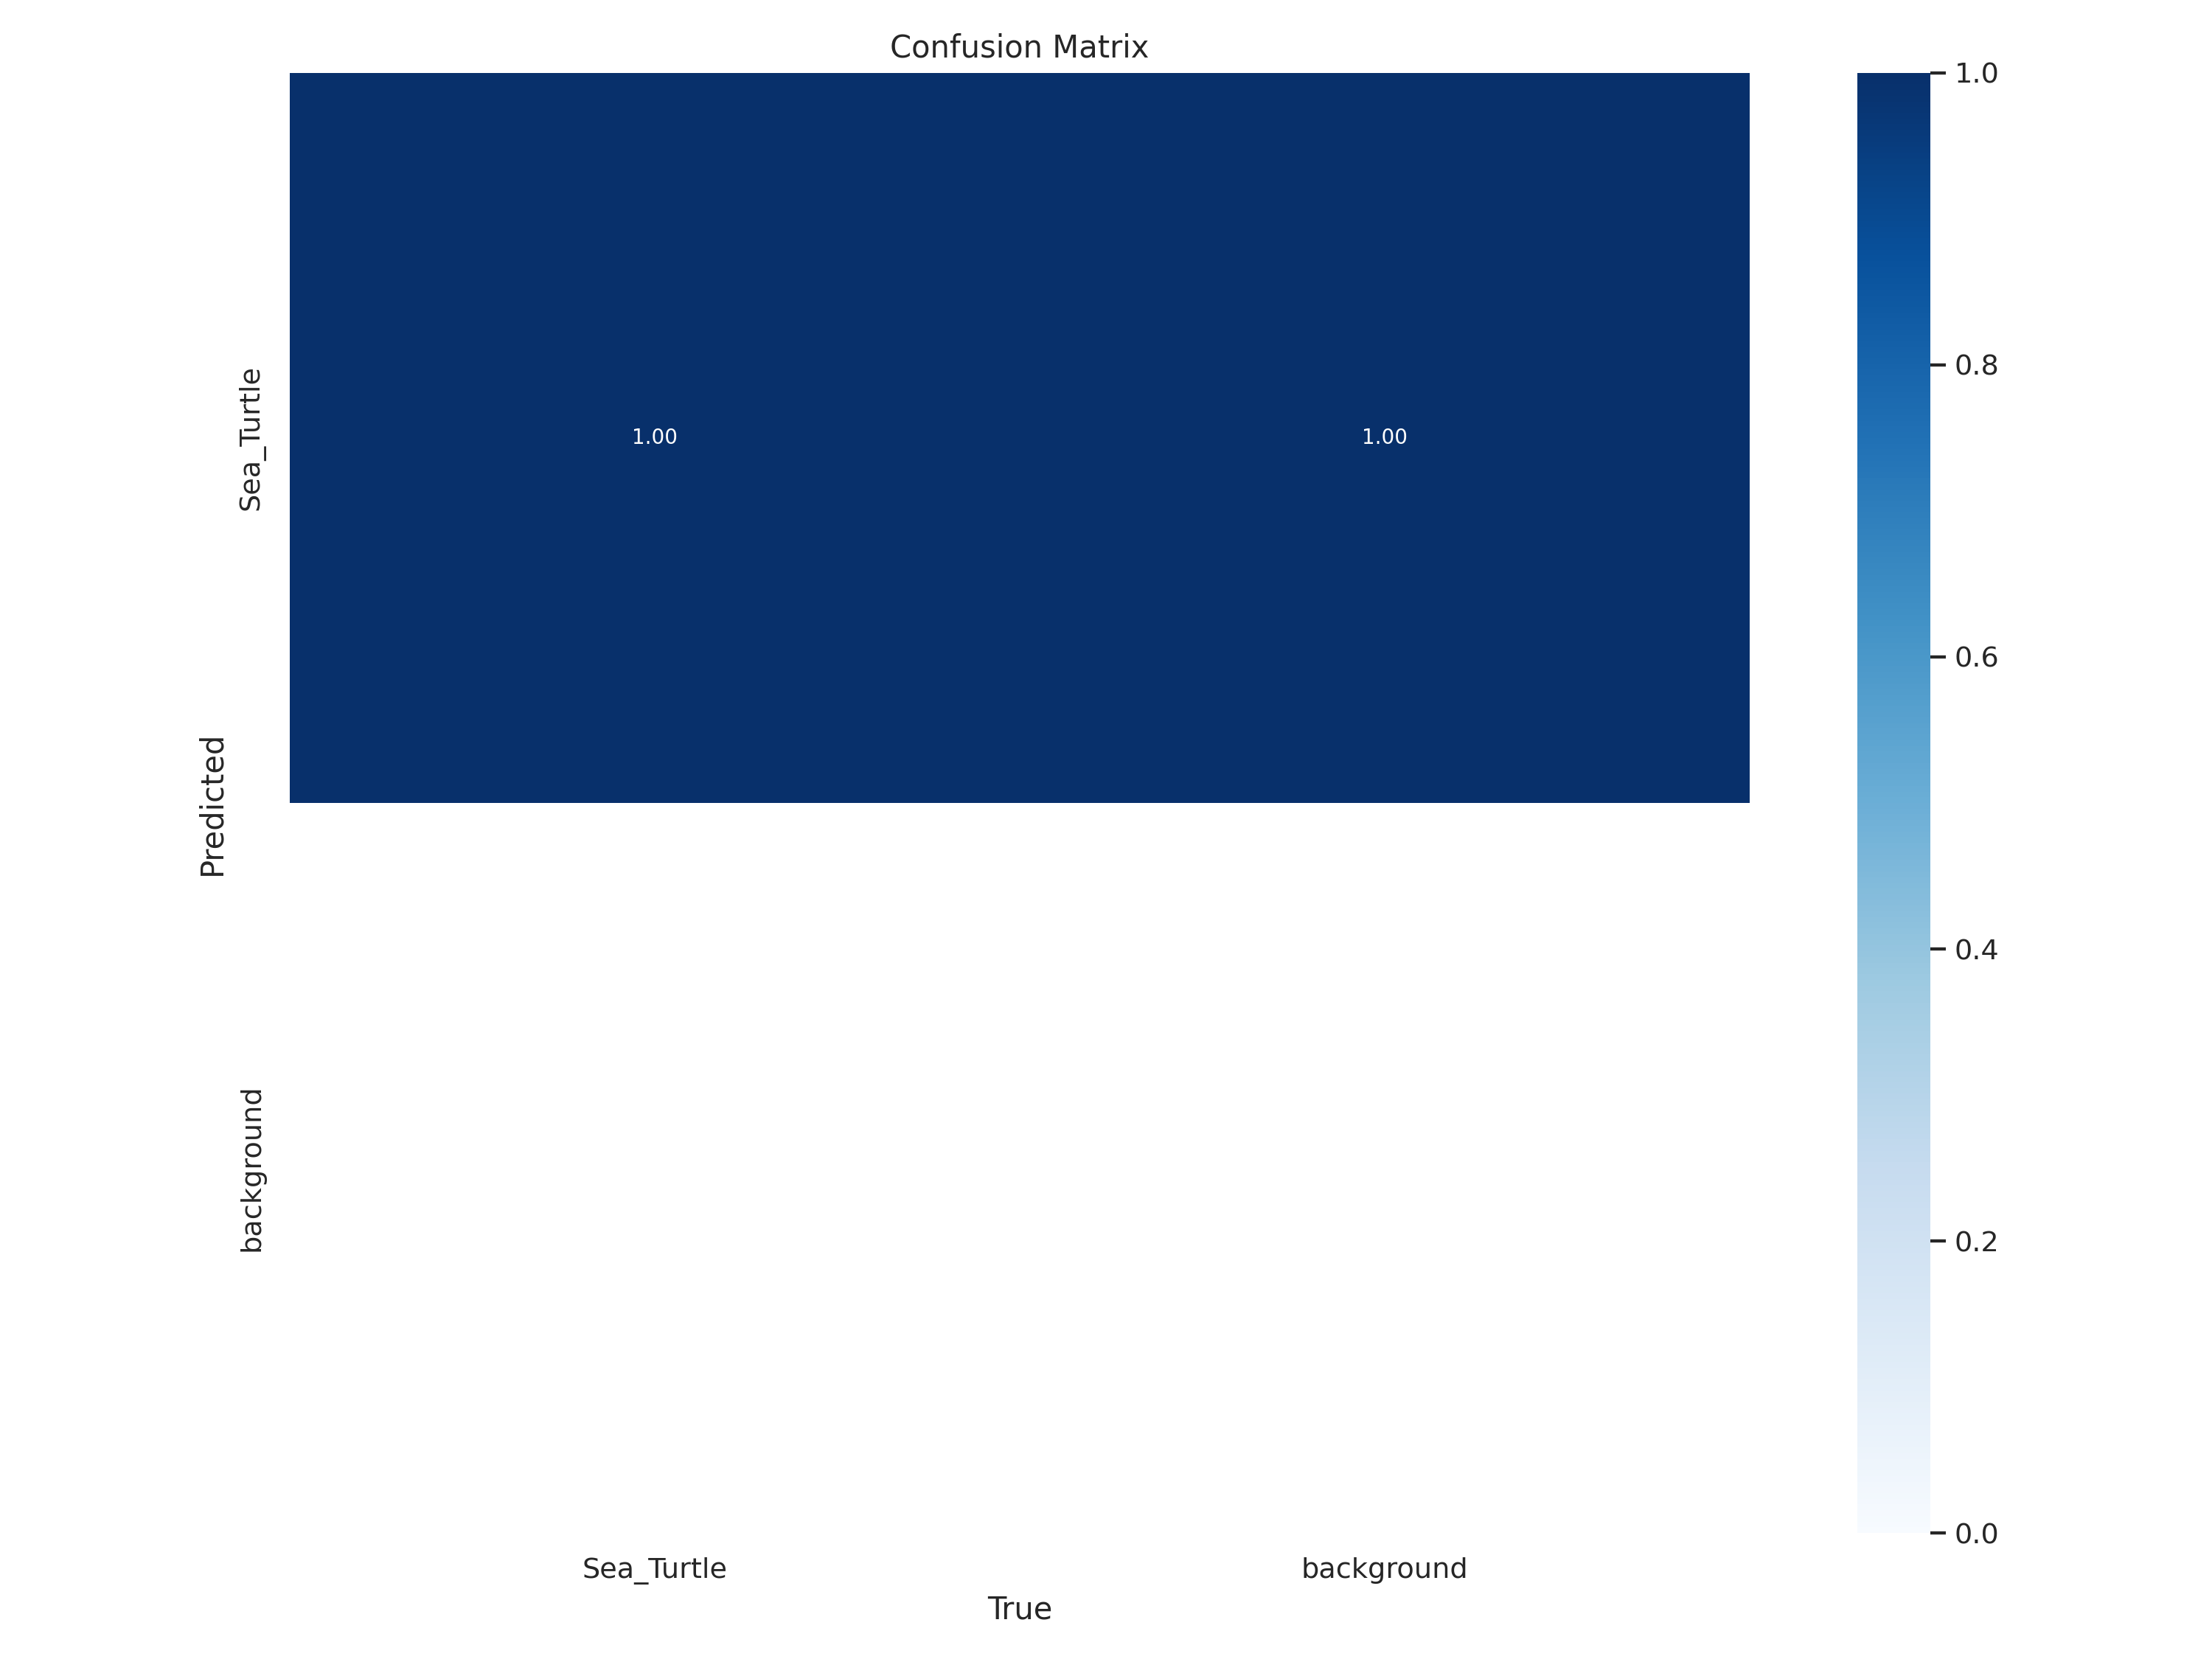

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


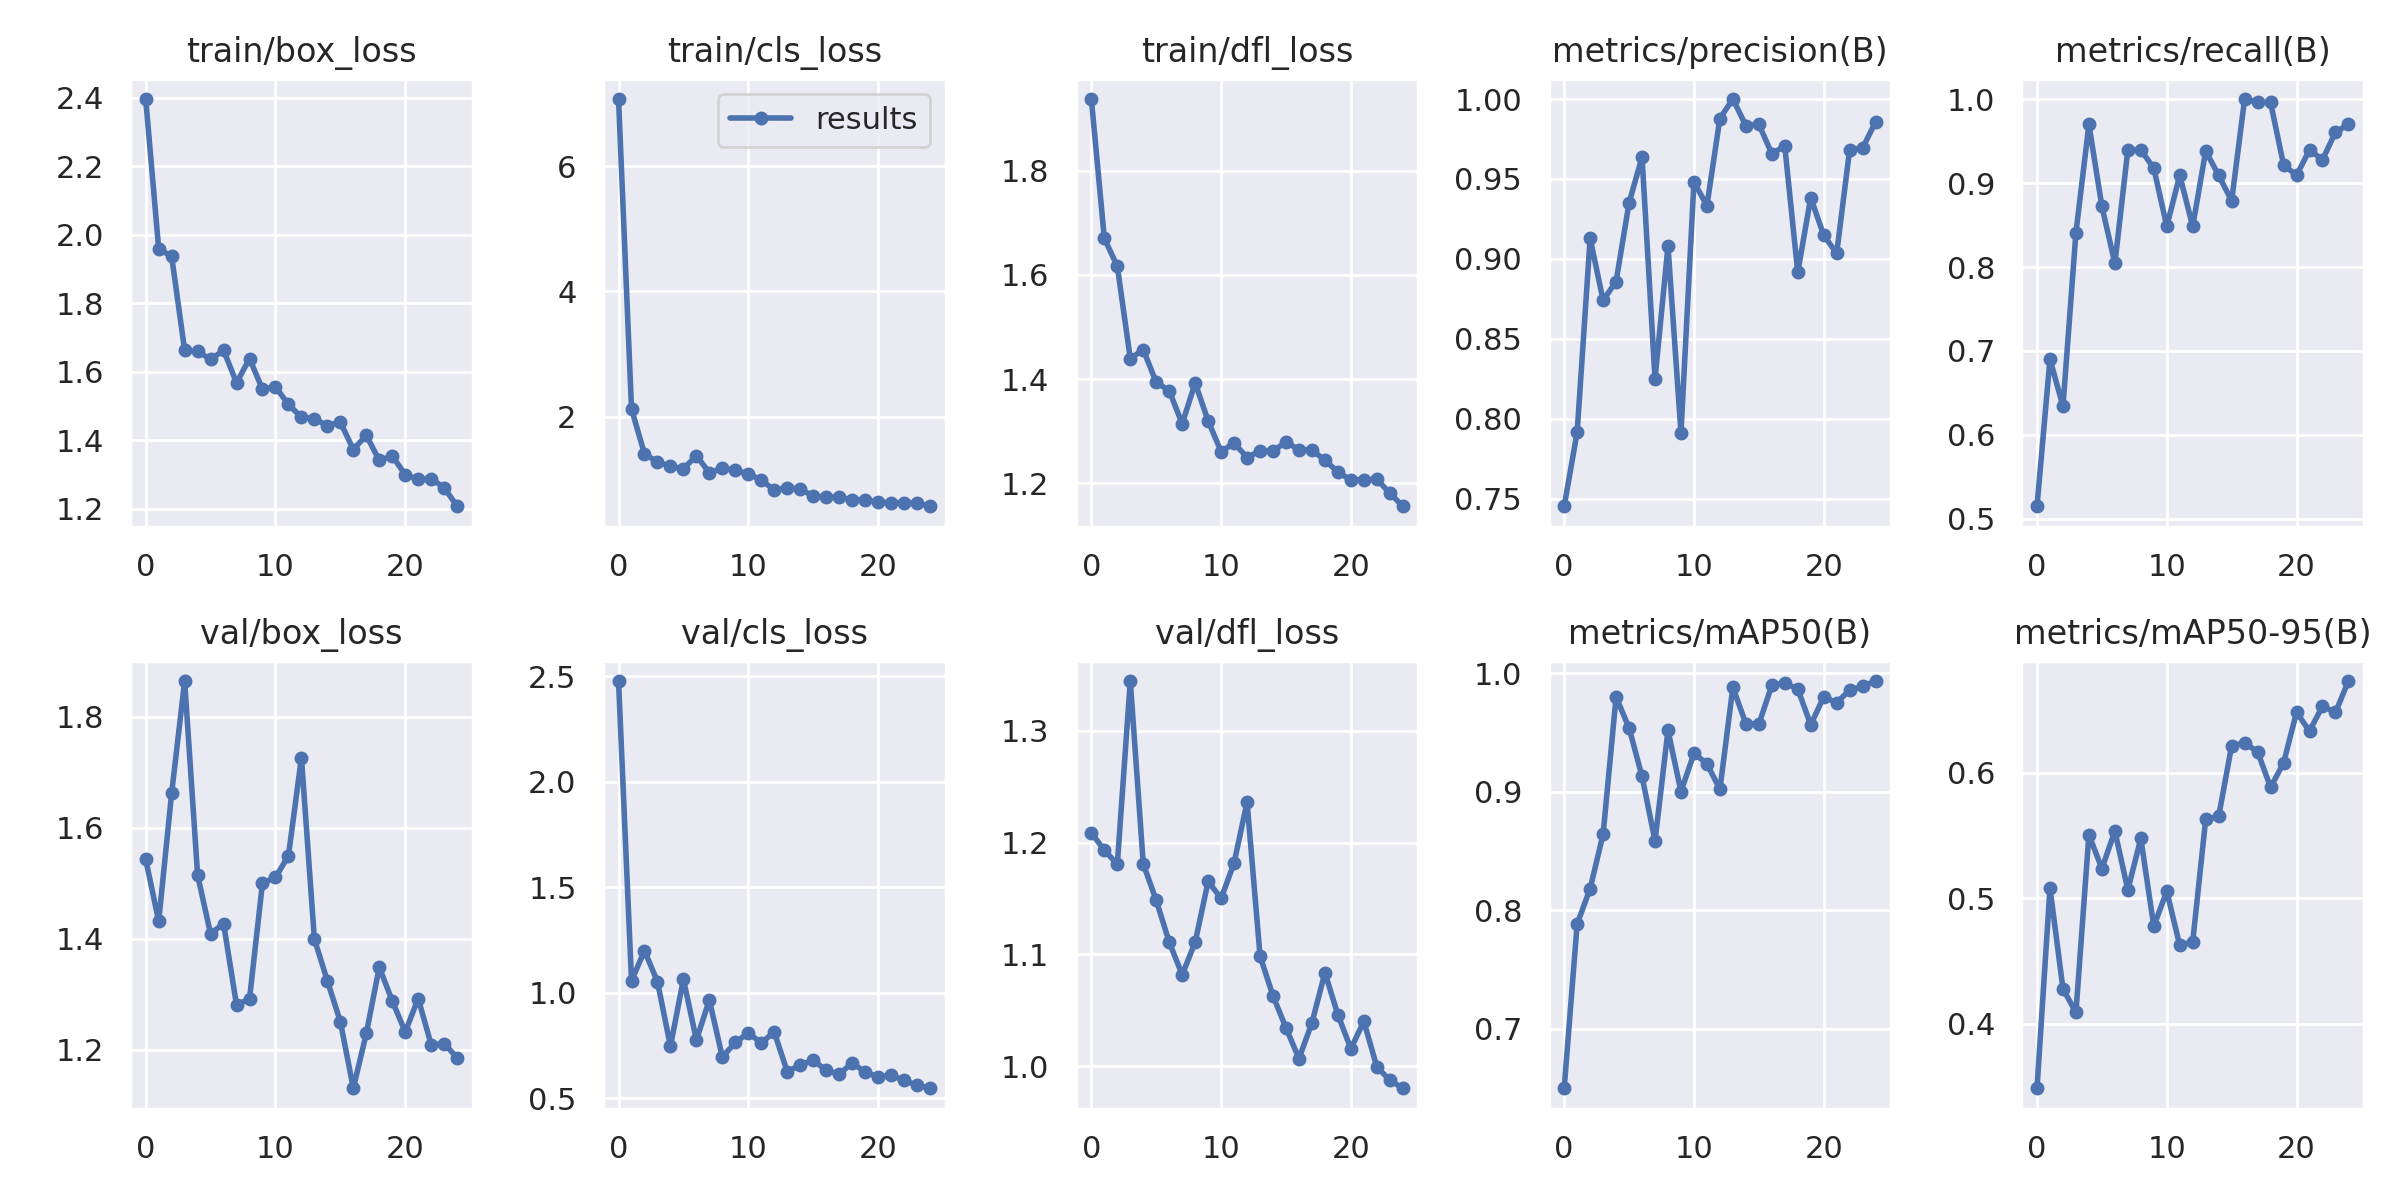

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


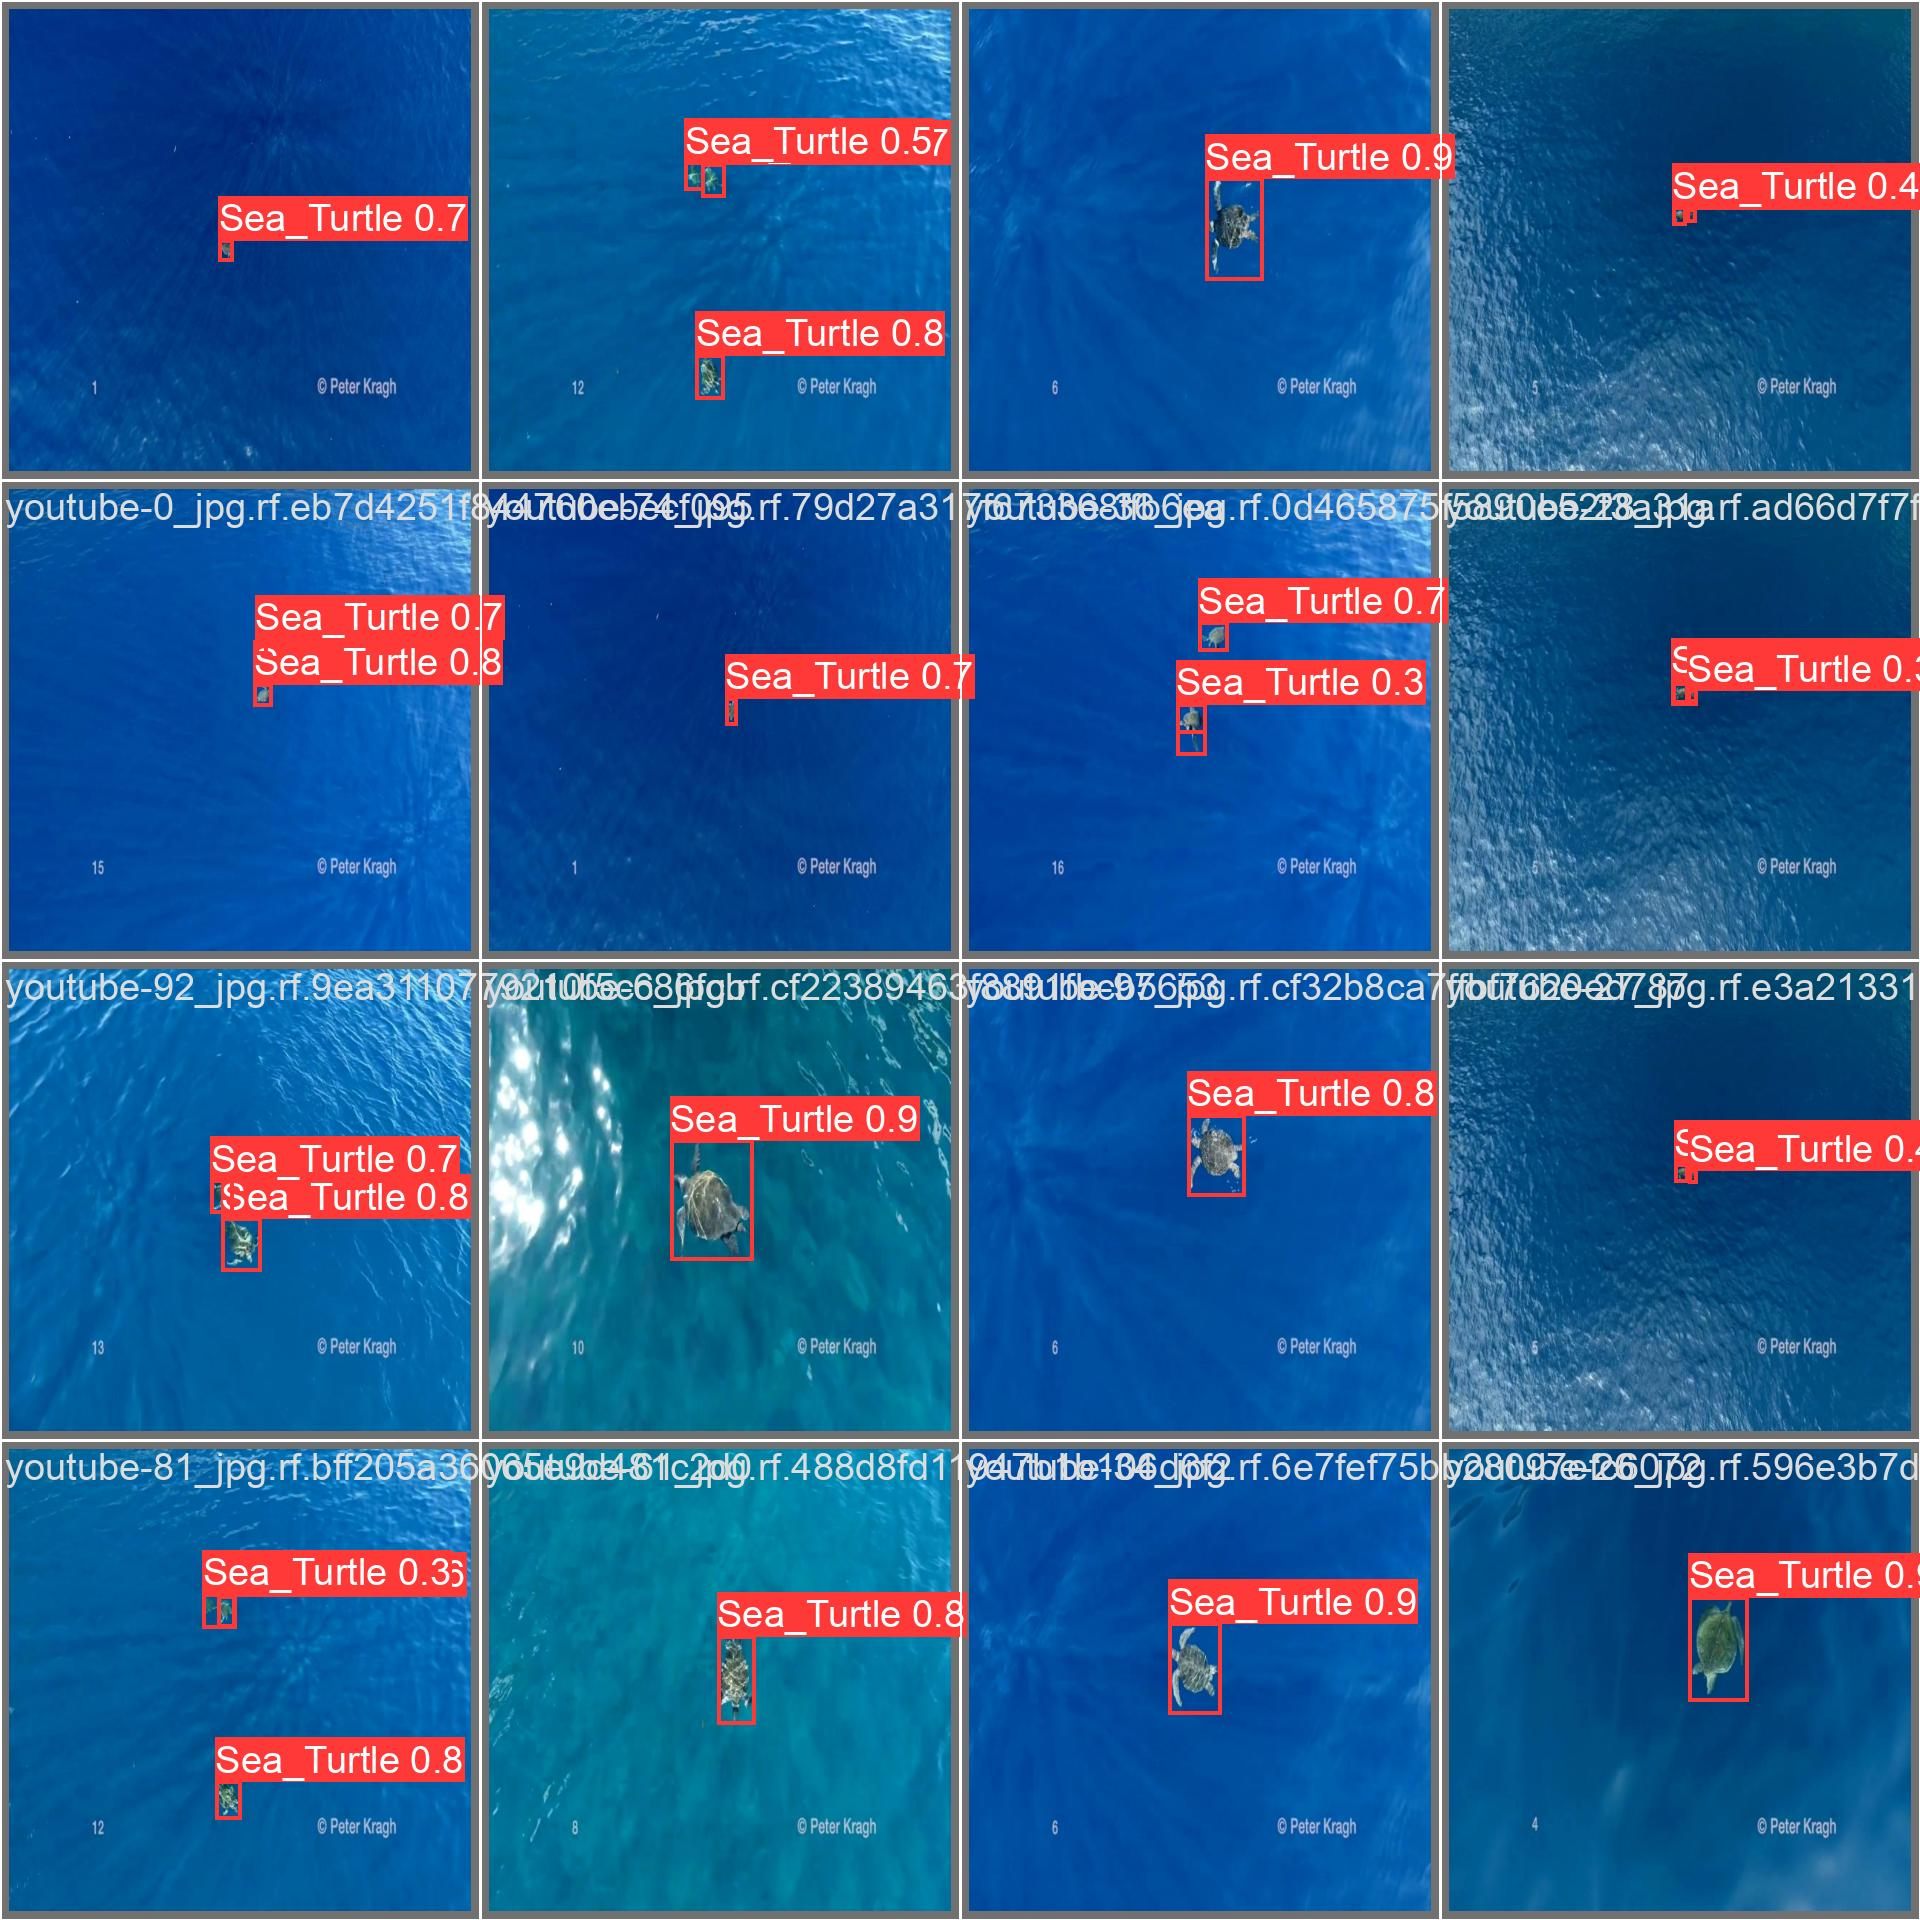

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-09-22 17:26:37.335636: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-22 17:26:39.403318: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Sea-Turtles-Model-1/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100% 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.10it/s]
                   all         21         33      0.984       0.97      0.994      0.678
Speed: 0.3ms pre-process, 30.5ms in

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-09-22 17:26:56.021949: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-22 17:26:57.049704: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/11 /content/datasets/Sea-Turtles-Model-1/test/images/youtube-111_jpg.rf.27459b2140905ddb737bf519019069f2.jpg: 800x800 2 Sea_Turtles, 25.6ms
image 2/11 /content/datasets/Sea-Turtles-Model-1/test/images/youtube-112_jpg.rf.220105b2fa04041d86c8a5e2c69e41d1.jpg: 800x800 2 Sea_Turtles, 24.8ms
image 3/11 /content/datasets/Sea-Turtles-Model-1/test/images/youtube-14_jpg.rf.b382f75bc15c

**NOTE:** Let's take a look at few results.

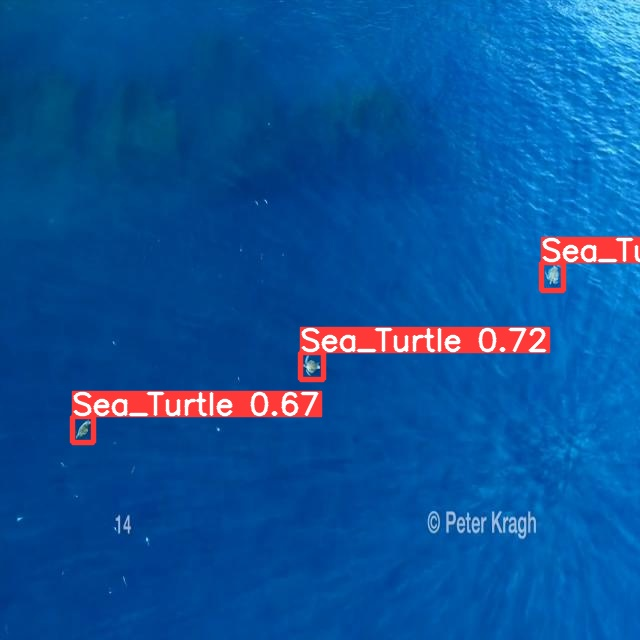

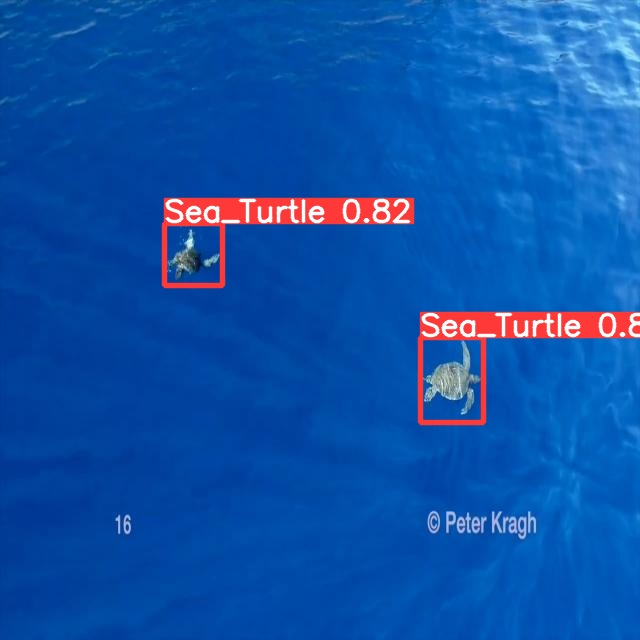

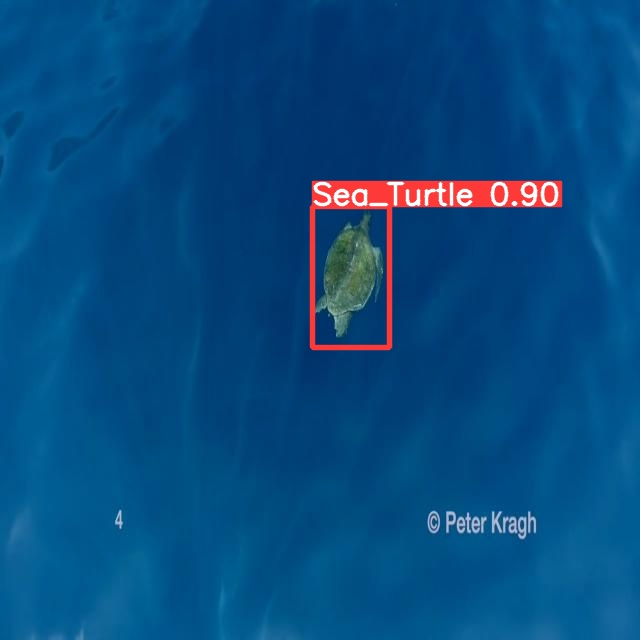

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/turtles_drone_beach.mp4  save=True

2023-09-22 17:34:28.187624: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-22 17:34:29.196658: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/1499) /content/turtles_drone_beach.mp4: 800x800 11 Sea_Turtles, 24.7ms
video 1/1 (2/1499) /content/turtles_drone_beach.mp4: 800x800 12 Sea_Turtles, 24.7ms
video 1/1 (3/1499) /content/turtles_drone_beach.mp4: 800x800 9 Sea_Turtles, 24.7ms
video 1/1 (4/1499) /content/turtles_drone_beach.mp4: 800x800 13 Sea_Turtles, 24.7ms
video 1/1 (5/1499) /content/turtles_drone_beach.mp4: 800x800 

In [ ]:
# Save Output with Bounding Boxes to a Text File
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/turtles_drone_beach.mp4 > {HOME}/output.txt

# Visualize Bounding Boxes on the Video and Save Annotated Video
import ast
import cv2

# Load the YOLO output from the text file
with open(f'{HOME}/output.txt', 'r') as f:
    yolo_output = f.readlines()

# Read the original video
video_path = f'{HOME}/datasets/turtles_drone_beach.mp4'
video_capture = cv2.VideoCapture(video_path)
frame_width = int(video_capture.get(3))
frame_height = int(video_capture.get(4))
output_video_path = f'{HOME}/annotated_turtles_drone_beach.mp4'
output_video = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), 30, (frame_width, frame_height))

# Process each frame and draw bounding boxes
for frame_id, frame_output in enumerate(yolo_output):
    ret, frame = video_capture.read()
    if not ret:
        break

    # Parse YOLO output for the current frame
    detections = ast.literal_eval(frame_output)
    for detection in detections:
        x, y, w, h, confidence, class_id = detection
        x1, y1, x2, y2 = int(x - w / 2), int(y - h / 2), int(x + w / 2), int(y + h / 2)

        # Draw bounding box on the frame using OpenCV
        color = (0, 255, 0)  # Green color for the bounding box
        thickness = 2
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, thickness)

        # Optionally, put the class label and confidence on the frame
        label = f"Class: {class_id}, Confidence: {confidence:.2f}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        cv2.putText(frame, label, (x1, y1 - 10), font, font_scale, color, thickness)

    # Write the frame with bounding boxes to the output video
    output_video.write(frame)

# Release video capture and video writer objects
video_capture.release()
output_video.release()

# Print a message indicating the completion of the video annotation and saving process
print("Video annotation and saving are complete.")


2023-09-22 17:37:53.653185: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-22 17:37:54.692127: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/1499) /content/turtles_drone_beach.mp4: 800x800 11 Sea_Turtles, 24.7ms
video 1/1 (2/1499) /content/turtles_drone_beach.mp4: 800x800 12 Sea_Turtles, 24.7ms
video 1/1 (3/1499) /content/turtles_drone_beach.mp4: 800x800 9 Sea_Turtles, 24.7ms
video 1/1 (4/1499) /content/turtles_drone_beach.mp4: 800x800 13 Sea_Turtles, 24.7ms
video 1/1 (5/1499) /content/turtles_drone_beach.mp4: 800x800 